In [2]:
import numpy as np
import pickle
import sys
import os
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.preprocessing import MinMaxScaler
from collections import defaultdict

In [3]:
def get_active_cells(traces):

    # going to return a dictionary with only active cells, formatted exactly the same as traces

    d = dict.fromkeys(traces.keys())

    for cell in traces:
        if traces[cell]['active'] == True:
            d[cell] = traces[cell]
        else:
            d.pop(cell,None)

    return d

In [4]:
def get_best_frequency_65db(cell_tuning,freqs):
    responses = cell_tuning[:,2]
    if np.all(responses == 0):
        max_response_idx = 12
    else:
        max_response_idx = np.argmax(responses)
    print(max_response_idx)
    return freqs[max_response_idx]


In [5]:
with open("C:/Users/Conor/Documents/Imaging_Data/Two-Photon/Psilocybin_Project/Evoked_Cohort_Mice/ID276/ID276_03032023_saline/TSeries-03032023-1447-060/suite2p/plane0/cells.pkl", 'rb') as f:
        cell_dictionary = pickle.load(f)

In [6]:
cell_dict = get_active_cells(cell_dictionary)

cell_list = list(cell_dict.keys())
nfreq = list(cell_dict[cell_list[0]]['traces'].keys())
nInt = list(cell_dict[cell_list[0]]['traces'][nfreq[0]].keys())
ntrial = list(cell_dict[cell_list[0]]['traces'][nfreq[0]][nInt[0]].keys())
nfreq.insert(0, 12)
print(nfreq, nInt, ntrial)
print(type(nfreq[12]))

[12, 4364, 5371, 6612, 8140, 10020, 12335, 15184, 18691, 23009, 28324, 34867, 42922] [35, 50, 65, 80] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
<class 'numpy.uint16'>


6
11
2
12
8
3
12
12
12
12
12
12
1
2
10
6
5
8
6
9
0
2
12
1
4
12
1
12
2
12
1
4
12
7
3
4
0
10
6
12
12
4
1
7
0
4
5
7
11
1
1
12
12
7
9
12
7
3
11
7
10
3
6
12
7
3
3
3
6
10
5
3
8
10
7
0
11
8
5
4
5
6
5
6
12
12
12
7
5
12
1
0
10
5
7
4
3
11
12
10
3
8
3
11
3
4
7
11
2
1
12
9
7
7
3
7
4
8
1
12
1
1
3
7
1
7
0
9
12
8
0
6
12
12
12
2
6
8
6
1
0
12
2
5
7
10
7
0
1
7
5
3
2
1
3
8
8
12
7
7
7
9
2
12
12
0
6
10
1
1
12
9
8
9
3
9
10
7
0
12
1
6
9
4
7
10
6
5
11
9
3
7
8
10
12
12
8
6
12
8
6
1
8
0
8
8
9
6
12
7
1
12
8
3
8
10
0
9
5
9
12
1
12
5
11
1
12
8
4
8
2
9
3
1
9
3
7
9
12
5
3
4
0
9
6
1
2
3
6
0
1
6
3
8
10
7
9
6
9
3
5
2
6
3
12
12
2
6
6
3
3
1
4
3
8
4
8
3
3
5
11
0
4
7
8
12
8
2
0
4
6
5
5
0
0
3
6
1
6
3
9
4
8
6
8
3
8
8
10
6
0
3
4
7
6
3
8


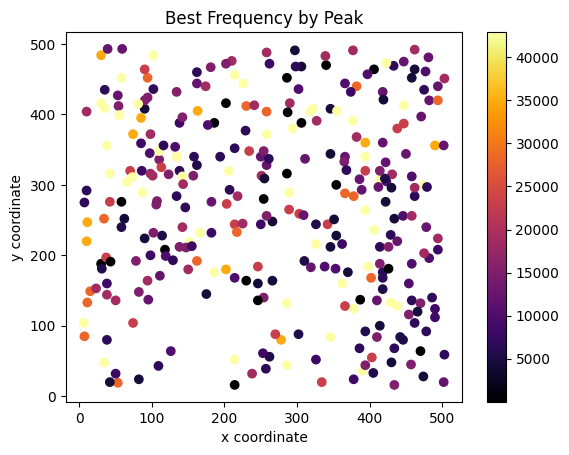

In [7]:
#Plot with coordinates only for 65 dB tuning.

x = []
y = []
z = []
for cell in cell_dict:
    x.append((cell_dict[cell]['x']))
    y.append((cell_dict[cell]['y']))
    z.append(get_best_frequency_65db(cell_dict[cell]['tuning'],nfreq))

plt.scatter(x,y,c=z,cmap=plt.get_cmap("inferno"))
plt.colorbar()
plt.title("Best Frequency by Peak")
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.show()

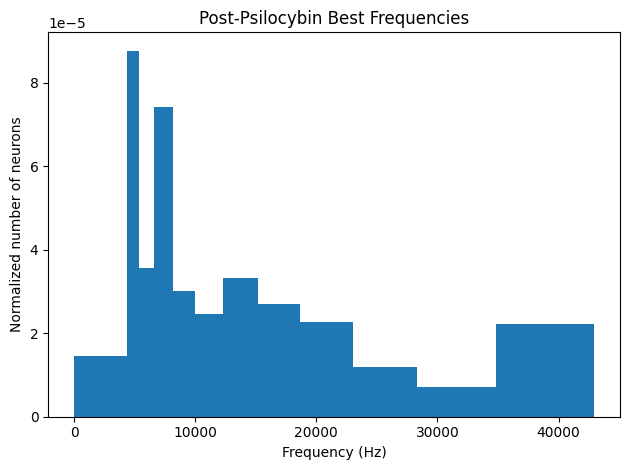

In [8]:
bins = nfreq

fig = plt.figure()
fig.patch.set_facecolor('white')
plt.hist(z,bins=bins,density=True)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Normalized number of neurons")
plt.title("Post-Psilocybin Best Frequencies")
plt.tight_layout()

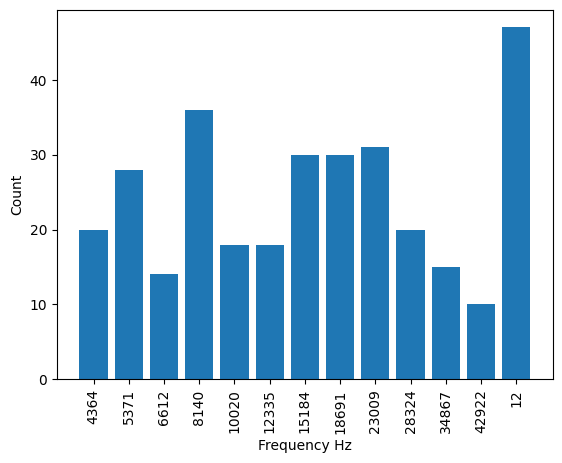

In [9]:
u, counts = np.unique(z, return_counts=True)
nfreq.append(nfreq.pop(nfreq.index(12)))
plt.bar(np.arange(len(u)),counts)
plt.xticks(np.arange(len(nfreq)), nfreq)
plt.xticks(rotation=90)
plt.xlabel('Frequency Hz')
plt.ylabel('Count')
plt.show()